In [63]:
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 통계검정
import scipy.stats as stats

#  분류 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 분포
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve

# 결측치처리
from sklearn.impute import SimpleImputer
#스케일링
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
# 라벨인코더
from sklearn.preprocessing import LabelEncoder


## 파일 불러오기 및 합치기

In [64]:
# 고객데이터
df=pd.read_csv('member_data.csv')
df

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal
...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal


In [65]:
# 판매데이터
df1=pd.read_csv('product_data_001.csv')
df2=pd.read_csv('product_data_002.csv')
df3=pd.read_csv('product_data_003.csv')
df4=pd.read_csv('product_data_004.csv')

In [66]:
result= pd.concat([df1,df2,df3,df4], join='inner')
result

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,2022-01-01,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04
1,2022-01-01,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09
2,2022-01-01,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12
3,2022-01-01,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23
4,2022-01-01,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29
...,...,...,...,...,...,...,...,...,...,...,...,...
52565,2022-10-30,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,NaN,13:26
52566,2022-10-30,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,NaN,10:58
52567,2022-10-30,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,NaN,14:36
52568,2022-10-30,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,NaN,16:23


## 고객데이터+판매데이터

In [72]:
# 판매데이터와 고객데이터를 회원번호를 기준으로 결합
dff = pd.merge(df, result, on=['회원번호','조합원상태'], how='left')
dff

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,두부/유부,두부,두부(1모:420g),2.0,7658,매장B,NaN,16:11
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,꿀,꿀,아카시아꿀(460g),1.0,27759,매장B,NaN,13:29
294641,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,고구마,고구마,밤고구마(1kg),1.0,6700,매장B,NaN,17:45
294642,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,빵,앙금크림빵,커스터드큐브빵(135g)/매장,1.0,5360,매장B,NaN,10:06
294643,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,양념채소,중파,중파(500g),1.0,4212,매장B,NaN,10:06


### 데이터 추출

In [74]:
df5=dff[(dff['배송서비스신청여부']=='미신청')&(dff['연령']>=30)&(dff['연령']<70)]

In [75]:
df5

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,두부/유부,두부,두부(1모:420g),2.0,7658,매장B,NaN,16:11
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,꿀,꿀,아카시아꿀(460g),1.0,27759,매장B,NaN,13:29
294641,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,고구마,고구마,밤고구마(1kg),1.0,6700,매장B,NaN,17:45
294642,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,빵,앙금크림빵,커스터드큐브빵(135g)/매장,1.0,5360,매장B,NaN,10:06
294643,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,양념채소,중파,중파(500g),1.0,4212,매장B,NaN,10:06


- 고객데이터: df
- 판매데이터: result(각각의 데이터는 df1~df4)
- 전체 데이터 머지: dff
- 연령/배송서비스신청여부: df5

## 시간대별 eda

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_98806/3686341651.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result['구매시각'] = pd.to_datetime(result['구매시각'])  # 시간 형식으로 변환


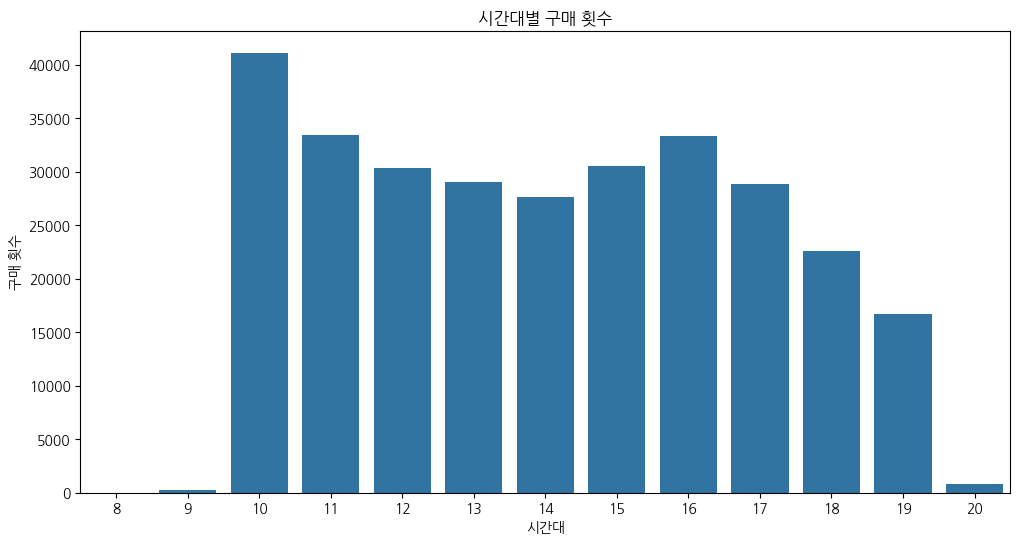

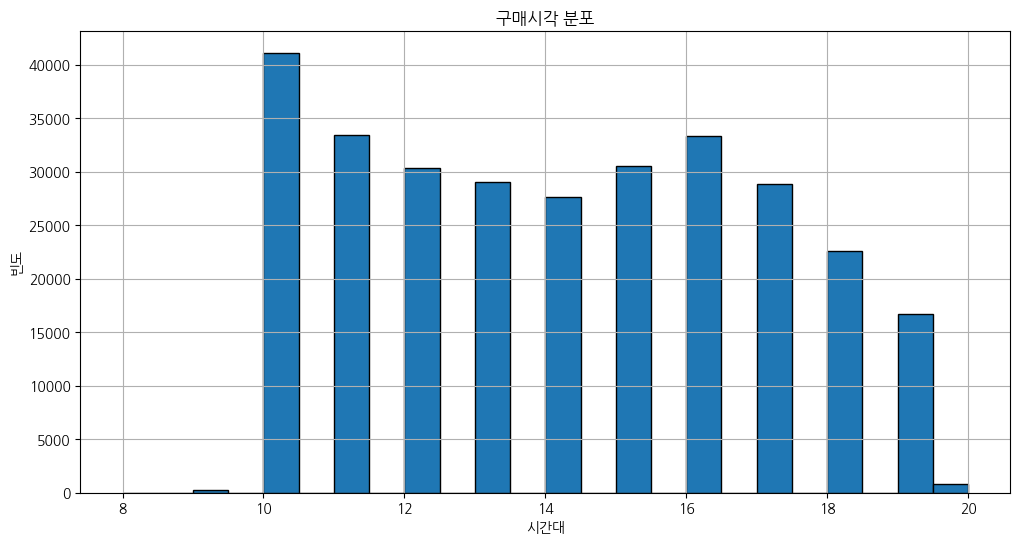

In [7]:
# '구매시각' 칼럼의 시계열 그래프
result['구매시각'] = pd.to_datetime(result['구매시각'])  # 시간 형식으로 변환
result['Hour'] = result['구매시각'].dt.hour  # 시간대를 추출하여 새로운 칼럼 생성

# 시간대별 구매 횟수 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=result)
plt.title('시간대별 구매 횟수')
plt.xlabel('시간대')
plt.ylabel('구매 횟수')
plt.show()

# '구매시각' 칼럼의 히스토그램
plt.figure(figsize=(12, 6))
result['Hour'].hist(bins=24, edgecolor='black')
plt.title('구매시각 분포')
plt.xlabel('시간대')
plt.ylabel('빈도')
plt.show()

## 연령 분포 eda

In [8]:
a=df[df['성별']=='여']

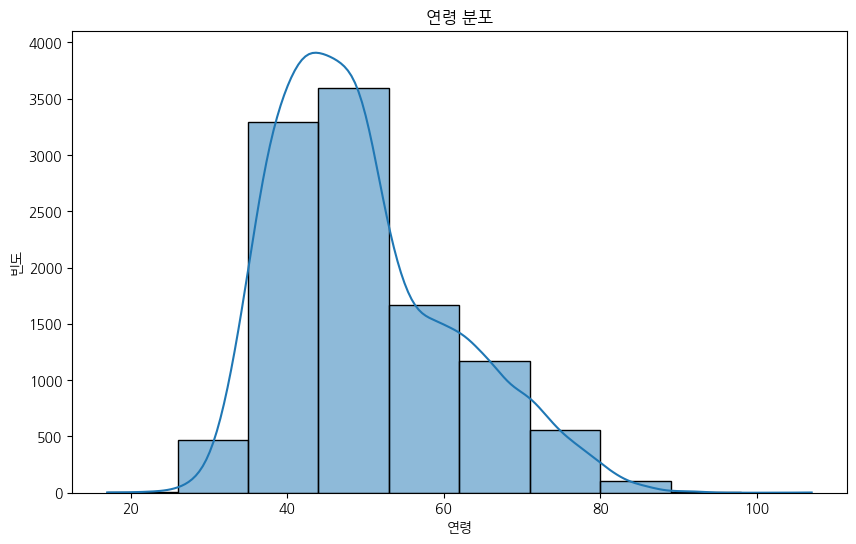

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(a['연령'], bins=10, kde=True)
plt.title('연령 분포')
plt.xlabel('연령')
plt.ylabel('빈도')
plt.show()

## 구매금액 합에 따라 정렬(+성별)

In [10]:
# pivot_table 생성 후 구매금액 기준으로 내림차순 정렬
pivot_table_result = dff.pivot_table(index='회원번호', values='구매금액', aggfunc='sum')
sorted_pivot_table = pivot_table_result.sort_values(by='구매금액', ascending=False)

# 회원번호에 대해 성별을 추출
gender_by_member = dff[['회원번호', '성별']].drop_duplicates().set_index('회원번호')

# 결과 출력
final_result = sorted_pivot_table.join(gender_by_member)
final_result

,구매금액,성별
회원번호,,
1670400000,13060734,남
436681536,9559980,여
381879424,9002241,여
193003584,6327044,여
762476352,5672698,여
...,...,...
18764160,-88827,여
459849984,-102612,여
399893760,-104526,남


## 물품 대/중/소 분류 개수

In [16]:
dff['물품대분류'].describe()

count     294645
unique        16
top           채소
freq       75965
Name: 물품대분류, dtype: object

In [17]:
dff['물품중분류'].describe()

count     294645
unique        64
top        두부/유부
freq       21028
Name: 물품중분류, dtype: object

In [19]:
dff['물품소분류'].describe()

count     294645
unique       391
top           두부
freq       18793
Name: 물품소분류, dtype: object

## 지역

In [30]:
dff.pivot_table(index='구매매장', columns='주소',values='회원번호', aggfunc='count')

주소,광주-기타,광주-산성동,광주-오포읍,기타-궁내동,기타-금곡동,기타-금광동,기타-기타,기타-동백동,기타-동천동,기타-보라동,...,처인구-모현면,처인구-삼가동,처인구-역북동,처인구-원삼면,처인구-유방동,처인구-이동면,하남-기타,하남-위례동,화성-기타,화성-보라동
구매매장,,,,,,,,,,,,,,,,,,,,,
매장A,71.0,1.0,124.0,NaN,NaN,2.0,2101.0,NaN,NaN,NaN,...,17.0,3.0,52.0,3.0,NaN,2.0,46.0,NaN,121.0,NaN
매장B,161.0,1.0,60.0,NaN,NaN,NaN,1850.0,12.0,4.0,4.0,...,72.0,5.0,9.0,1.0,24.0,NaN,10.0,NaN,164.0,NaN
매장C,125.0,1.0,39.0,NaN,NaN,4.0,4362.0,NaN,NaN,78.0,...,33.0,3.0,30.0,19.0,37.0,NaN,55.0,2.0,270.0,8.0
매장D,62.0,1.0,15.0,3.0,10.0,NaN,2043.0,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,12.0,NaN,65.0,2.0


In [35]:
a=dff[dff['구매매장']=='매장A']
a.pivot_table(index='주소', columns='구매매장',values='회원번호', aggfunc='count').sort_values(by='매장A',ascending=False).head(10)

구매매장,매장A
주소,
수지구-동천동,28727
수지구-풍덕천동,9022
기타-기타,2101
수지구-기타,2022
수지구-신봉동,1224
수지구-성복동,1168
수지구-상현동,997
수지구-죽전동,701
서울 강남구-기타,554


In [36]:
b=dff[dff['구매매장']=='매장B']
b.pivot_table(index='주소', columns='구매매장',values='회원번호', aggfunc='count').sort_values(by='매장B',ascending=False).head(10)

구매매장,매장B
주소,
수지구-상현동,34276
수지구-풍덕천동,12287
기흥구-보정동,4401
수지구-성복동,4144
기타-기타,1850
수원 영통구-기타,857
수지구-신봉동,674
수지구-죽전동,660
기타-비조합원,441


In [37]:
c=dff[dff['구매매장']=='매장C']
c.pivot_table(index='주소', columns='구매매장',values='회원번호', aggfunc='count').sort_values(by='매장C',ascending=False).head(10)

구매매장,매장C
주소,
수지구-풍덕천동,83625
수지구-성복동,9455
수지구-상현동,6369
수지구-신봉동,6121
기타-기타,4362
수지구-동천동,1466
수지구-죽전동,1183
분당구-정자동,1110
수원 영통구-기타,940


In [38]:
d=dff[dff['구매매장']=='매장D']
d.pivot_table(index='주소', columns='구매매장',values='회원번호', aggfunc='count').sort_values(by='매장D',ascending=False).head(10)

구매매장,매장D
주소,
수지구-신봉동,37104
수지구-성복동,8104
기타-기타,2043
수지구-풍덕천동,1644
수지구-상현동,1381
수원 영통구-기타,675
수지구-기타,577
수지구-동천동,379
서울 강남구-기타,352


## 배송

### 고령이 몇살인지

In [54]:
a= dff[dff['배송서비스신청여부']=='신청']

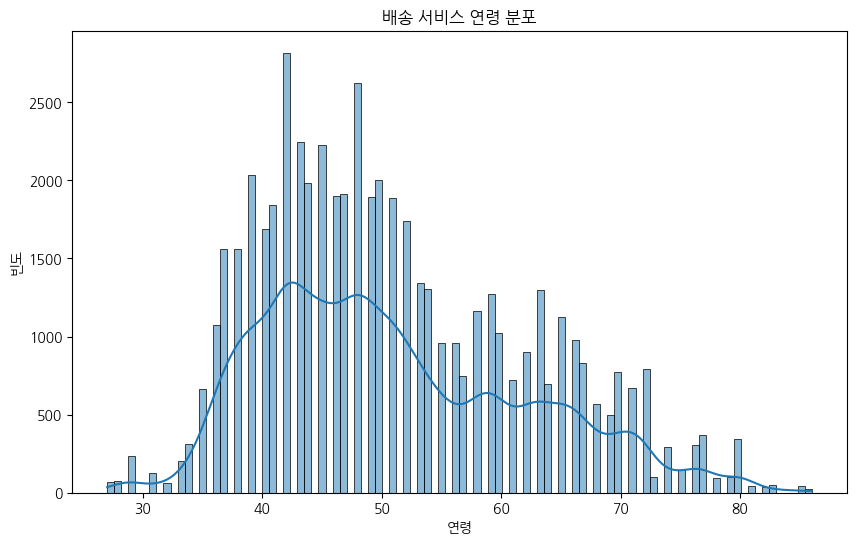

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(a['연령'], bins=100, kde=True)
plt.title('배송 서비스 연령 분포')
plt.xlabel('연령')
plt.ylabel('빈도')
plt.show()

In [56]:
a

,회원번호,조합원상태_x,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,조합원상태_y,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,Hour
37,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-01,정상회원,반찬,두부/유부,두부,두부(반모:270g),1.0,2872,매장C,NaN,2024-02-14 14:09:00,14
38,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-04,정상회원,생활용품,화장품,세안제/팩,자연그대로 거품세안제,-1.0,-28716,매장C,2022-01-05,2024-02-14 16:19:00,16
39,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-04,정상회원,간식,떡,가래떡,떡국떡(유기:800g),-1.0,-11295,매장C,2022-01-05,2024-02-14 16:19:00,16
40,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-04,정상회원,서류,감자,감자,감자(1kg),1.0,5743,매장C,NaN,2024-02-14 16:17:00,16
41,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-11,정상회원,채소,버섯,목이버섯,목이버섯(200g),1.0,6318,매장C,NaN,2024-02-14 10:31:00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,2022-09-19,정상회원,간식,잼/병조림/기타,잼,딸기잼(480g),4.0,52838,매장B,NaN,2024-02-14 19:30:00,19
294551,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,2022-10-05,정상회원,수산,냉동수산,냉동패류,냉동굴(350g),1.0,8806,매장B,NaN,2024-02-14 14:33:00,14
294552,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,2022-10-10,정상회원,채소,쌈채소류,상추,상추(200g),1.0,2680,매장B,NaN,2024-02-14 18:40:00,18
294553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,2022-10-21,정상회원,축산물,알,유정란,유정란/매장용(15알/국내산),1.0,10338,매장B,NaN,2024-02-14 18:22:00,18


In [50]:
a['회원번호'].nunique()

1043

In [52]:
# '구매시각' 칼럼의 시계열 그래프
dff['구매시각'] = pd.to_datetime(dff['구매시각'])  # 시간 형식으로 변환
dff['Hour'] = dff['구매시각'].dt.hour  # 시간대를 추출하여 새로운 칼럼 생성

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_98806/4232494554.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dff['구매시각'] = pd.to_datetime(dff['구매시각'])  # 시간 형식으로 변환


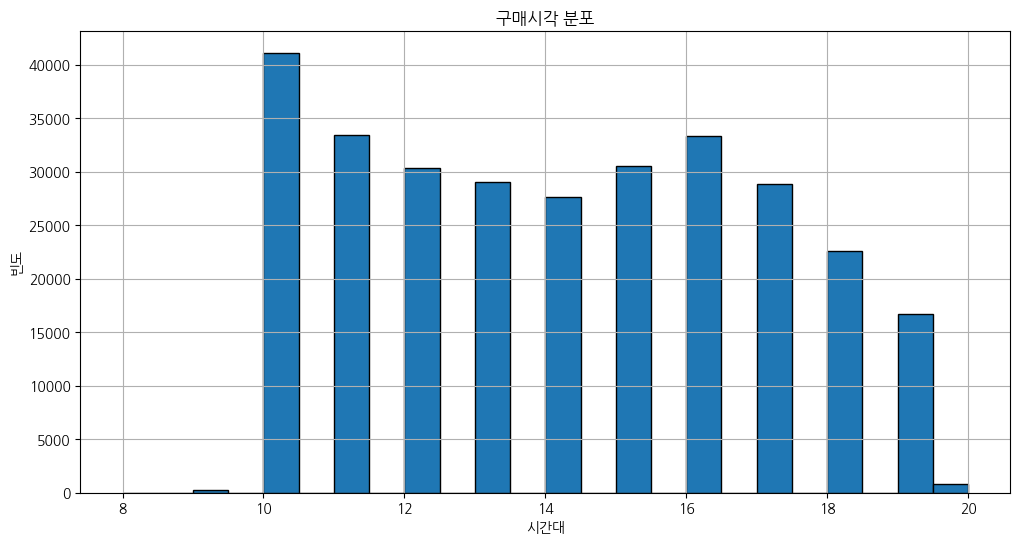

In [61]:
# '구매시각' 칼럼의 히스토그램
plt.figure(figsize=(12, 6))
dff['Hour'].hist(bins=24, edgecolor='black')
plt.title('구매시각 분포')
plt.xlabel('시간대')
plt.ylabel('빈도')
plt.show()

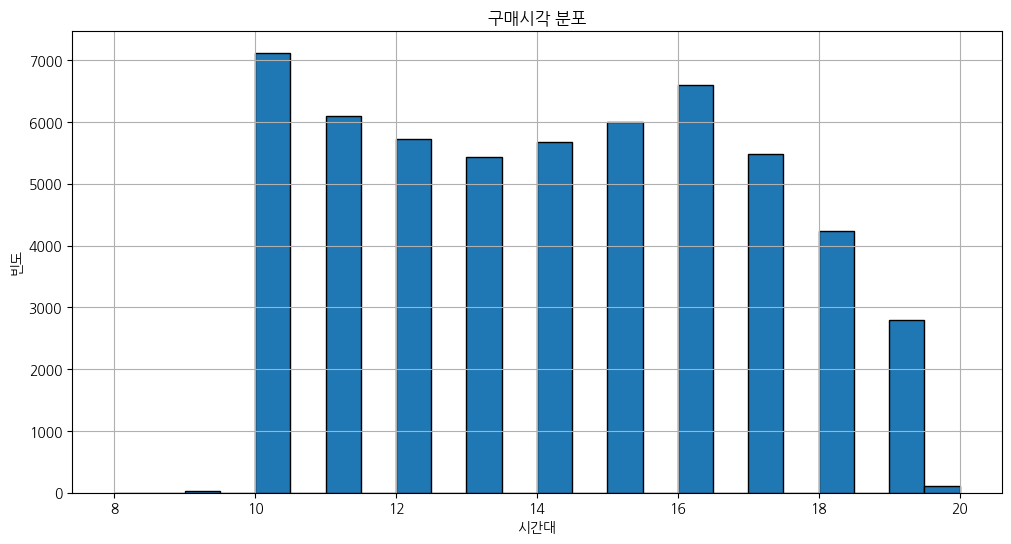

In [60]:
# '구매시각' 칼럼의 히스토그램
plt.figure(figsize=(12, 6))
a['Hour'].hist(bins=24, edgecolor='black')
plt.title('구매시각 분포')
plt.xlabel('시간대')
plt.ylabel('빈도')
plt.show()

## 